<a href="https://colab.research.google.com/github/nicholasproietti/LGM/blob/main/lc_process_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.1 Install eleanor](#first-bullet)

[1.2 Get the name of stars from table](#second-bullet)

[1.3 Get LC](#third-bullet)

[1.4 ](#fourth-bullet)

# 1.1 Install lightkurve <a class="anchor" id="first-bullet"></a>

In [ ]:
 !pip install eleanor
 !pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 7.6 MB/s 
     |████████████████████████████████| 826 kB 56.5 MB/s 
     |████████████████████████████████| 247 kB 62.7 MB/s 
     |████████████████████████████████| 4.5 MB 40.8 MB/s 
     |████████████████████████████████| 832 kB 35.6 MB/s 
     |████████████████████████████████| 48 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 33.2 MB/s 
     |████████████████████████████████| 1.6 MB 40.1 MB/s 
     |████████████████████████████████| 98 kB 3.6 MB/s 
     |████████████████████████████████| 41 kB 163 kB/s 
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144485 sha256=02c45e9edce7e9a977d13aacdebf823e74feea02e843815befca6684a550f0c5
  Stored in directory: /root/.cache/pip/wheels/f8/cb/ec/8b5b8fd5a7281de8a9db2767b7b37bf11bf65b0b661c7484ab
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl s

# 1.2 Get the name list of stars from table <a class="anchor" id="second-bullet"></a>

In [ ]:
# import eleanor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
KOI = pd.read_csv('q1_q17_dr24_koi_2022.11.01_10.01.01.csv')
KOI

#print(TOI['toi'])

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,NaN,0,0,0,0,...,772.22,6802.0,1,q1_q17_dr24_tce,5850.0,4.455,0.950,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,NaN,0,1,0,0,...,3973.70,6714.5,1,q1_q17_dr24_tce,6350.0,4.021,1.991,292.24728,47.969521,10.463
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,NaN,0,0,0,0,...,97.10,2207.8,1,q1_q17_dr24_tce,4777.0,4.590,0.765,297.70935,48.080853,9.174
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,NaN,0,1,0,0,...,4055.29,262.6,1,q1_q17_dr24_tce,6244.0,3.657,2.992,294.35654,38.947380,11.432
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,898.71,383.4,1,q1_q17_dr24_tce,5753.0,4.003,1.747,289.73972,44.647419,11.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,11463950,K07616.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,1,0,0,0,...,NaN,NaN,1,q1_q17_dr24_tce,NaN,NaN,NaN,295.95383,49.374859,13.397
7466,11559304,K07617.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,3.26,8.2,1,q1_q17_dr24_tce,3578.0,4.893,0.375,291.97635,49.575771,15.720
7467,11621897,K07618.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,1,0,0,0,...,60.99,9.8,1,q1_q17_dr24_tce,6297.0,4.448,1.031,296.82455,49.684910,14.491
7468,12253534,K07619.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,1,0,0,0,...,2.05,14.1,1,q1_q17_dr24_tce,6098.0,4.097,1.590,288.66644,50.982529,12.159


# 1.3 Get LC <a class="anchor" id="second-bullet"></a>

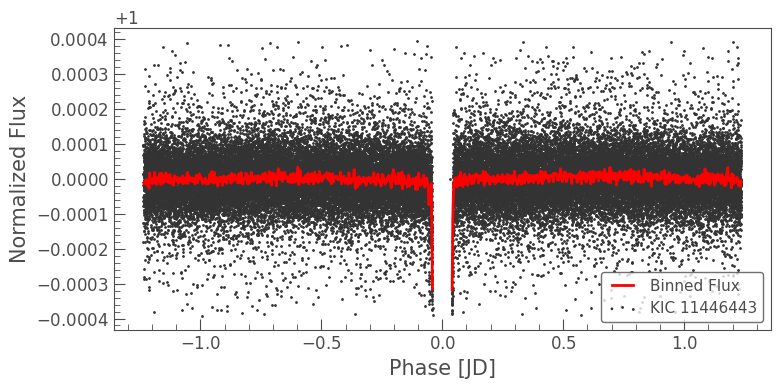

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt




for ind, row in KOI.iterrows():
  if row['koi_disposition'] == 'CONFIRMED':
    kepid = str(row['kepid'])
    search_result = lk.search_lightcurve(kepid, author='Kepler', cadence='long')
    lc_collection = search_result.download_all()
    #lc_collection.plot();
    lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
    #lc.plot();
    # Create array of periods to search
    period = np.linspace(1, 20, 10000)
    # Create a BLSPeriodogram
    planet_b_period = row['koi_period']
    planet_b_t0 = row['koi_time0bk']
    planet_b_dur = row['koi_duration']
    #planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur/24)
    ax = lc.fold(planet_b_period, planet_b_t0).scatter()
    #planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
    #ax.set_xlim(-planet_b_period/2, planet_b_period/2);
    lc.fold(planet_b_period, planet_b_t0).bin(planet_b_period/1000).plot(ax=ax, c='r', lw=2, label='Binned Flux')
    break

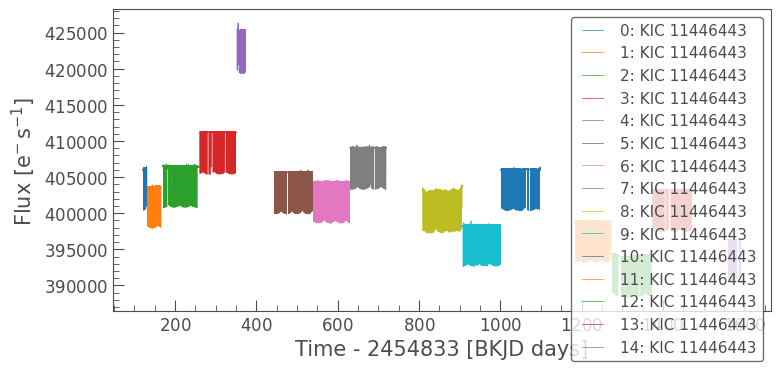

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt

# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('11446443', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

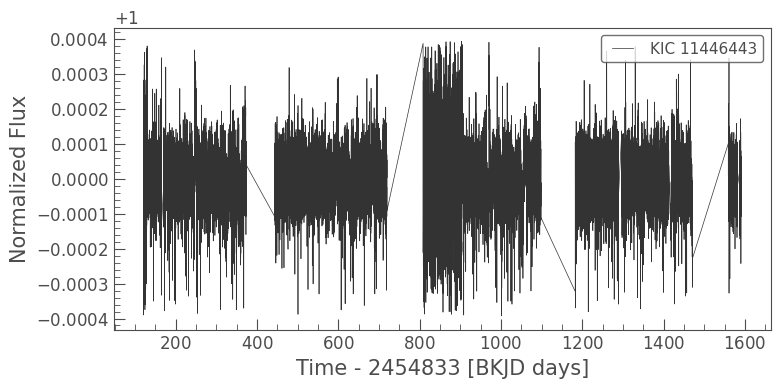

In [ ]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

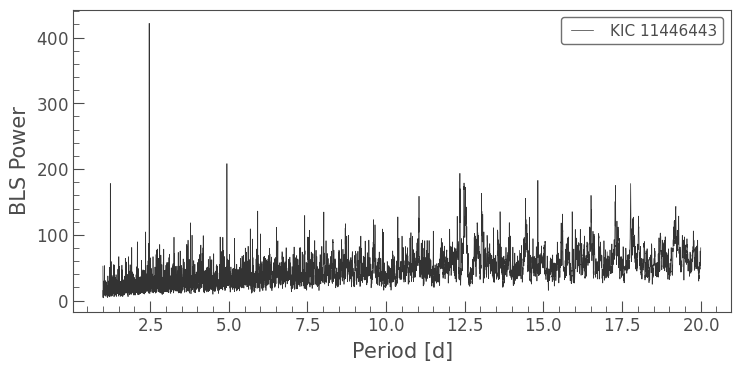

In [ ]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [ ]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 2.47074707 d>

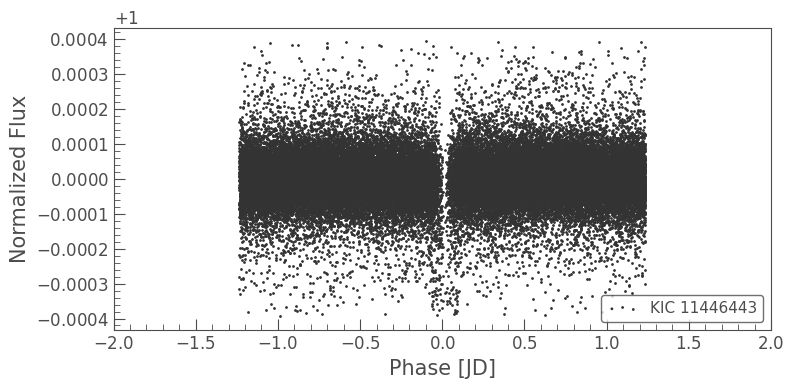

In [ ]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-2, 2);

In [ ]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

(-2.0, 2.0)

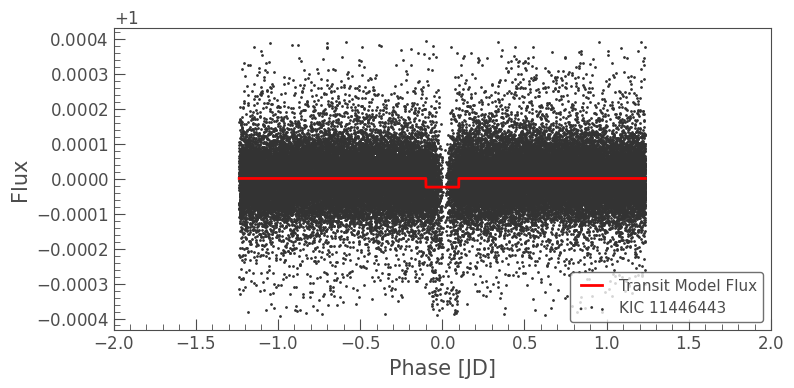

In [ ]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-2, 2)

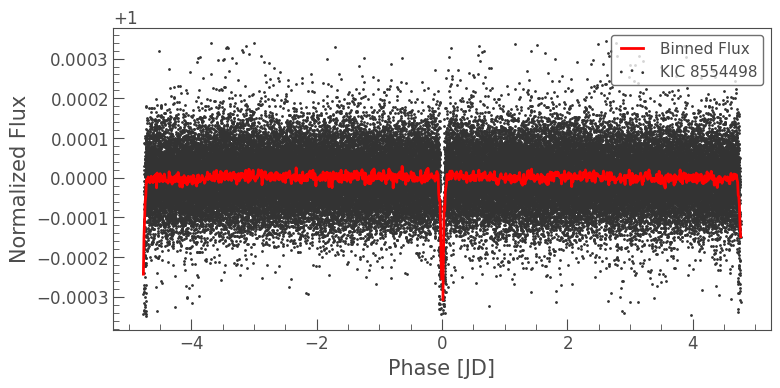

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt




for ind, row in KOI.iterrows():
  if row['koi_disposition'] != 'CONFIRMED':
    kepid = str(row['kepid'])
    search_result = lk.search_lightcurve(kepid, author='Kepler', cadence='long')
    lc_collection = search_result.download_all()
    #lc_collection.plot();
    lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
    #lc.plot();
    # Create array of periods to search
    period = np.linspace(1, 20, 10000)
    # Create a BLSPeriodogram
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls.plot();
    planet_b_period = bls.period_at_max_power
    planet_b_t0 = bls.transit_time_at_max_power
    planet_b_dur = bls.duration_at_max_power

    #planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur/24)
    ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
    #planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
    lc.fold(planet_b_period, planet_b_t0).bin(planet_b_period/1000).plot(ax=ax, c='r', lw=2, label='Binned Flux')
    
    break